In [5]:
import pandas as pd

# Load the first few rows of each file to understand the structure
try:
    ptbdb_abnormal = pd.read_csv('D:\\mlmed2026\\heartbeat_data\\ptbdb_abnormal.csv', header=None)
    print("PTBDB Abnormal shape:", ptbdb_abnormal.shape)
    print(ptbdb_abnormal.head())
except Exception as e:
    print("Error reading ptbdb_abnormal:", e)

try:
    ptbdb_normal = pd.read_csv('D:\\mlmed2026\\heartbeat_data\\ptbdb_normal.csv', header=None)
    print("PTBDB Normal shape:", ptbdb_normal.shape)
    print(ptbdb_normal.head())
except Exception as e:
    print("Error reading ptbdb_normal:", e)

try:
    mitbih_test = pd.read_csv('D:\\mlmed2026\\heartbeat_data\\mitbih_test.csv', header=None)
    print("MIT-BIH Test shape:", mitbih_test.shape)
    print(mitbih_test.head())
except Exception as e:
    print("Error reading mitbih_test:", e)

PTBDB Abnormal shape: (10506, 188)
        0         1         2         3         4         5         6    \
0  0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1  1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2  1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3  0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4  0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.749783  0.687229  0.635100  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.184826  0.153349  0.121872  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.685100  0.670507  0.667435  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.367837  0.381701  0.389094  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.319834  0.266874  0.308411  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  1.0  
1  0.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers

In [6]:
# Load data
df_normal = pd.read_csv('D:\\mlmed2026\\heartbeat_data\\ptbdb_normal.csv', header=None)
df_abnormal = pd.read_csv('D:\\mlmed2026\\heartbeat_data\\ptbdb_abnormal.csv', header=None)

In [7]:
# Concatenate
df = pd.concat([df_normal, df_abnormal], axis=0, ignore_index=True)

# Separate features and label
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [8]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape for CNN: (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (11641, 187, 1)
Testing shape: (2911, 187, 1)


In [9]:
# Build Model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.Conv1D(32, 5, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 5, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)

In [11]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9244


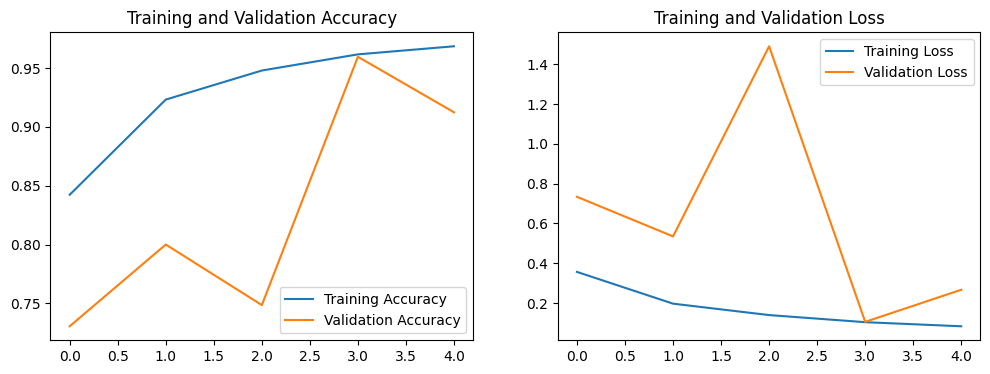

In [13]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# SAVE the figure before showing it
plt.savefig('training_plot.png') 
plt.show()